- The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
- The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



## #Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

- Variable (Abbr.) Unit Min Max Mean
- Ambient temperature (AT) C â€“6.23 37.10 17.71
- Ambient pressure (AP) mbar 985.85 1036.56 1013.07
- Ambient humidity (AH) (%) 24.08 100.20 77.87
- Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
- Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
- Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
- Turbine after temperature (TAT) C 511.04 550.61 546.16
- Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
- Turbine energy yield (TEY) MWH 100.02 179.50 133.51
- Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
- Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [1]:
# importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df=pd.read_csv("gas_turbines.csv")

In [3]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


## Checking For Nan and Duplicated Values

In [6]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

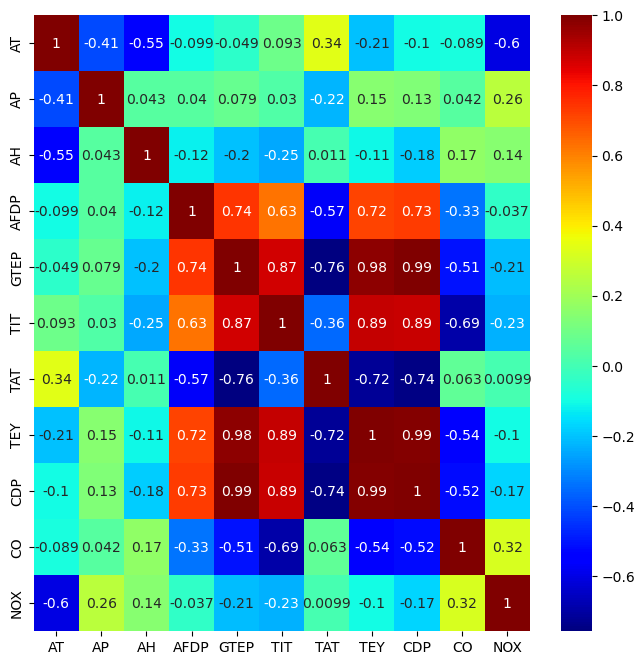

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True, cmap="jet");

## Correlation with Target Column

In [10]:
df.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

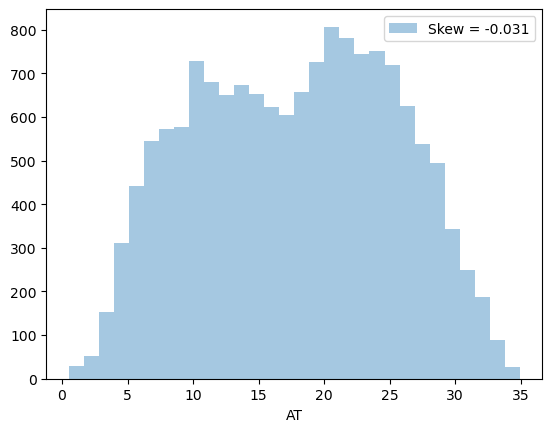

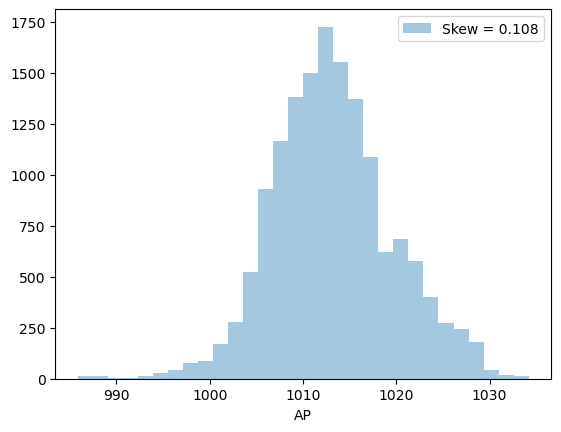

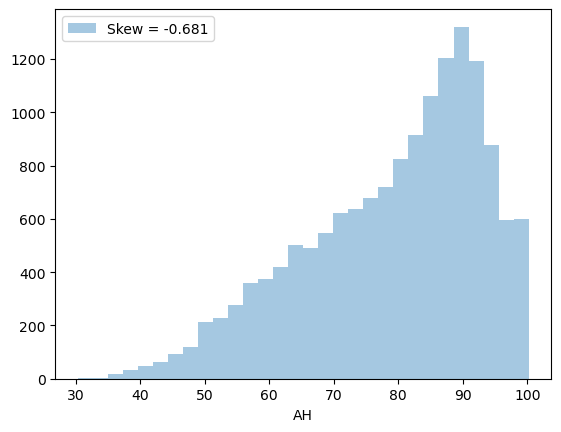

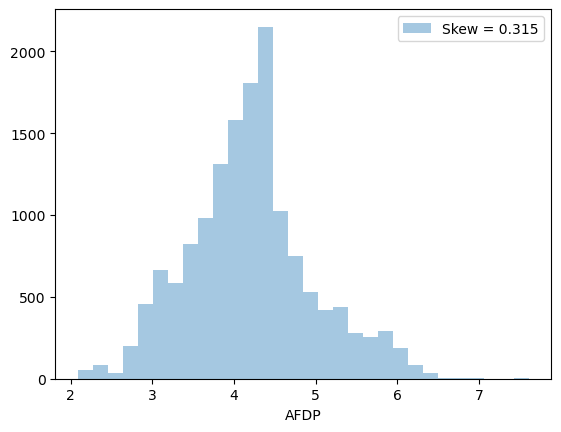

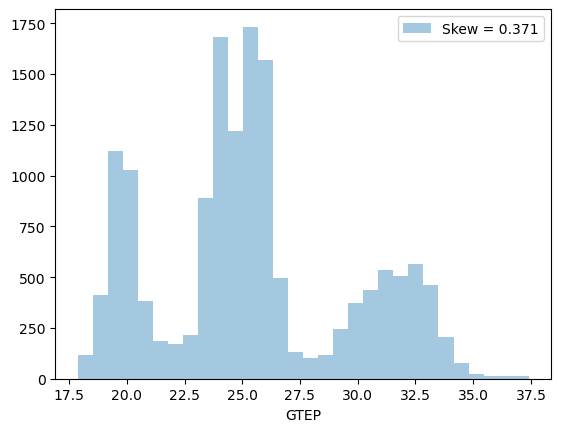

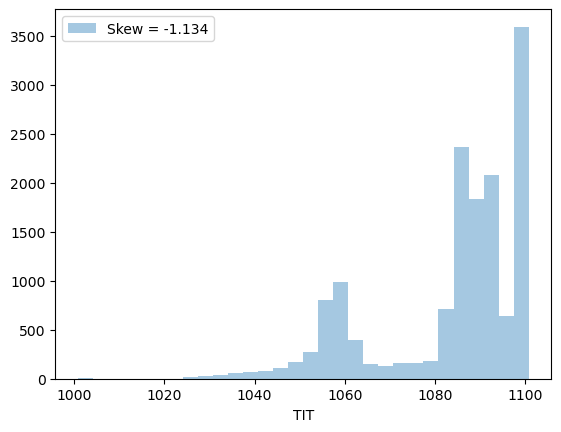

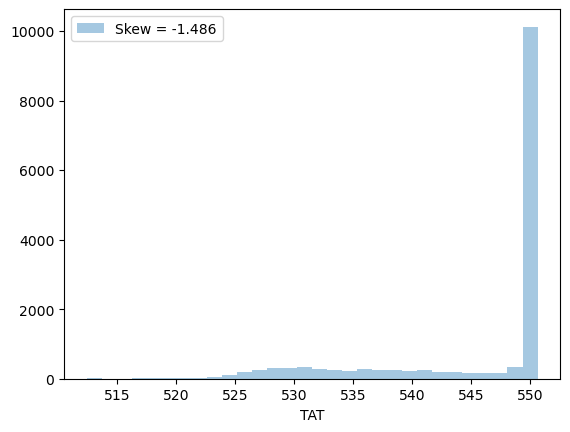

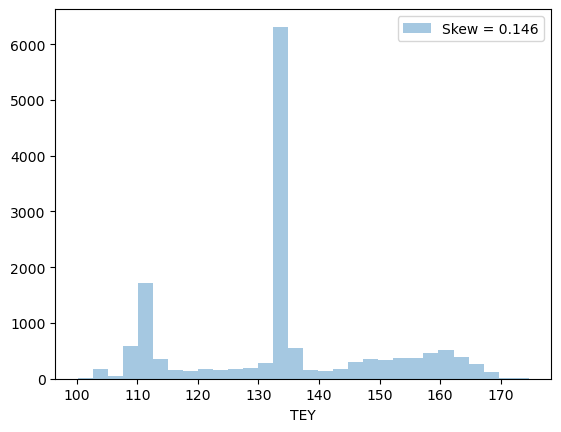

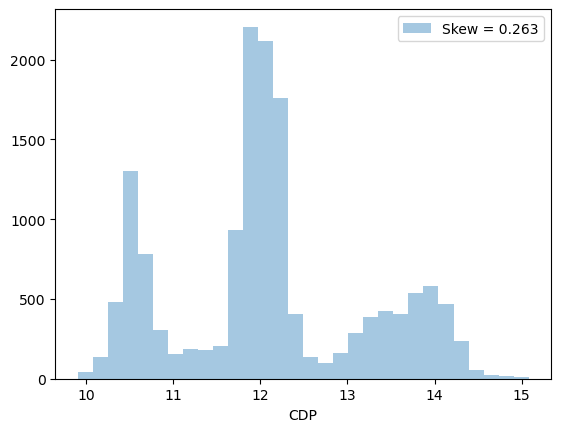

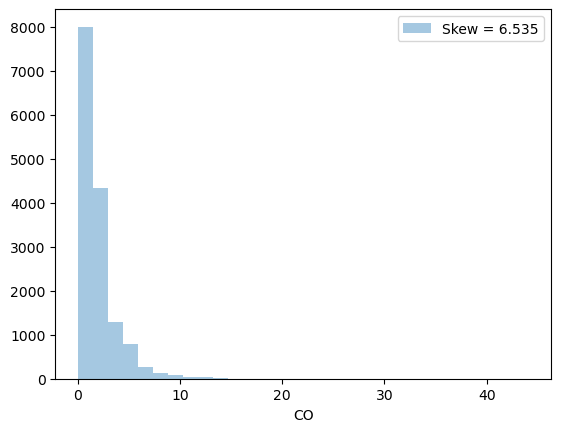

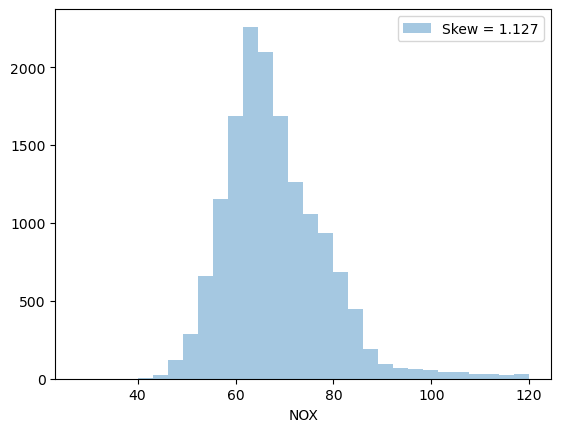

In [11]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

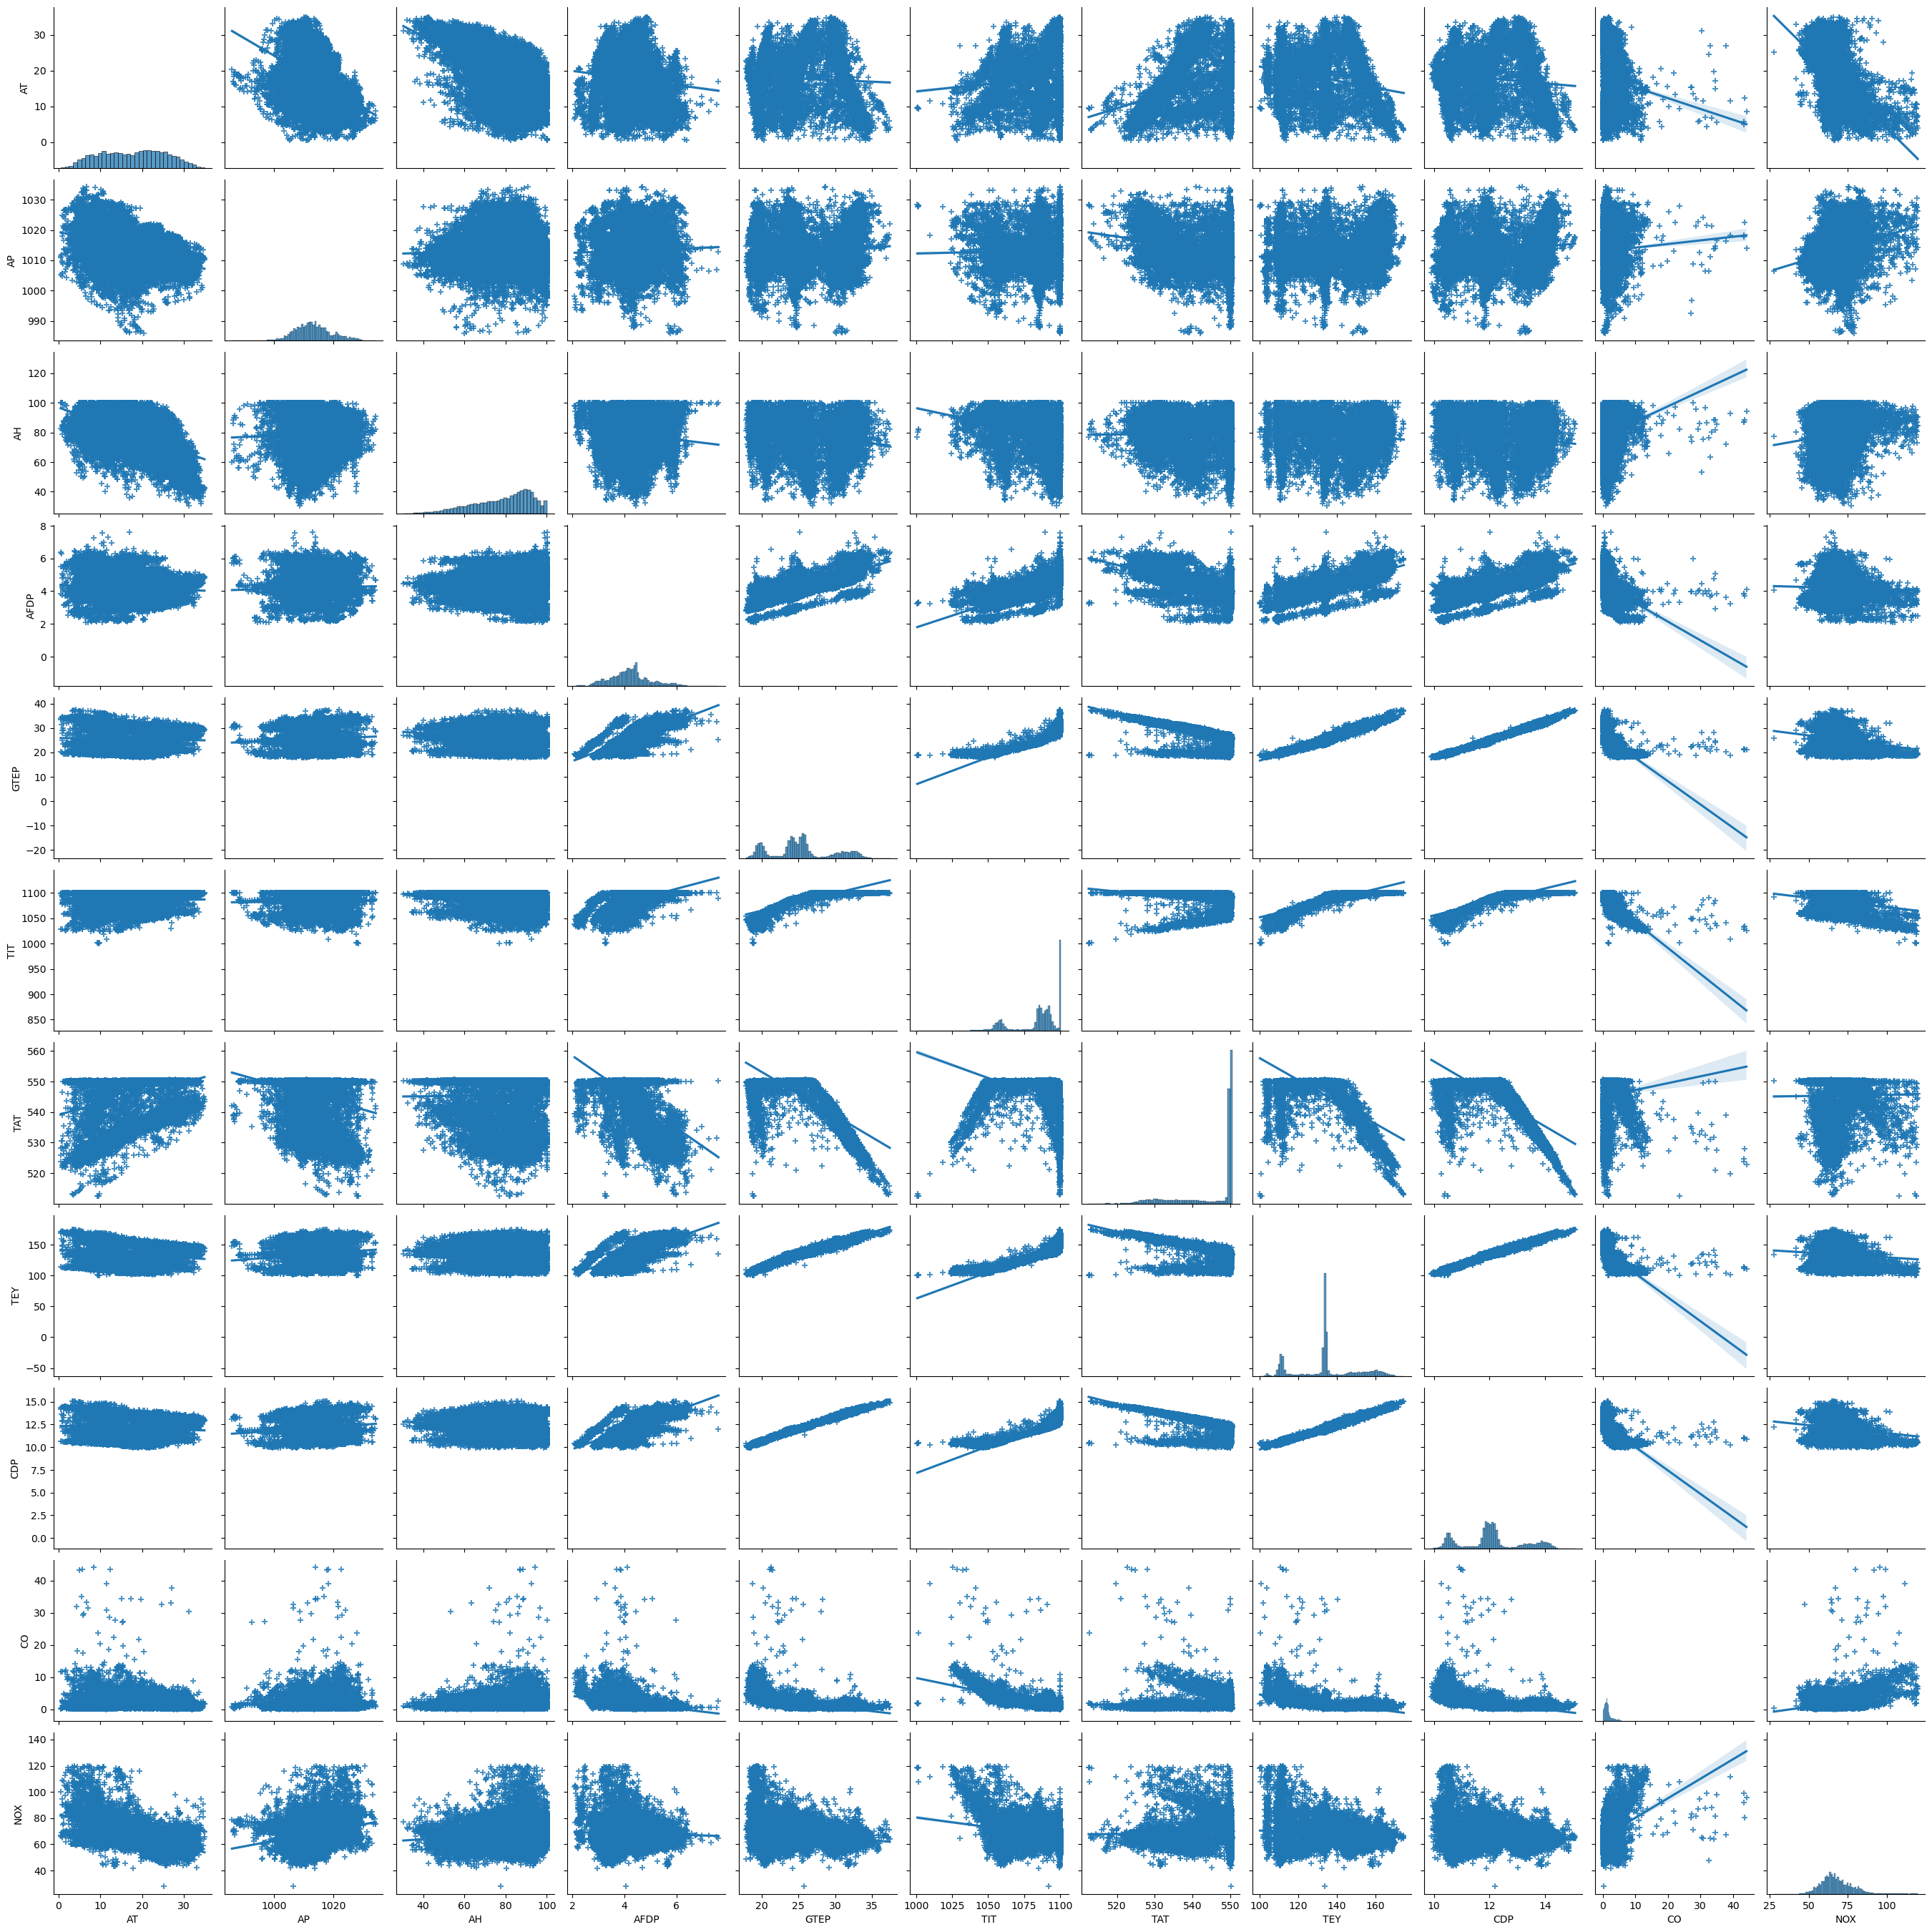

In [12]:
sns.pairplot(df,markers="+",kind='reg', diag_kind="auto")

In [13]:
x=df.drop(["TEY"],axis=1).values
y=df["TEY"].values

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [16]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [17]:
from tensorflow.keras.layers import Dense
from scipy.stats.morestats import optimize
ann=Sequential()
ann.add(Dense(units=10,activation="relu"))
ann.add(Dense(units=10,activation="relu"))
ann.add(Dense(units=1))
ann.compile(optimizer="adam", loss="mse")
ann.fit(xtrain,ytrain,epochs=50,validation_data=[xtrain,ytrain],callbacks=[early_stop])

Epoch 1/50
329/329 [==============================] - 3s 6ms/step - loss: 16570.7559 - val_loss: 12343.9346
Epoch 2/50
329/329 [==============================] - 1s 4ms/step - loss: 6872.2471 - val_loss: 2346.7148
Epoch 3/50
329/329 [==============================] - 2s 5ms/step - loss: 1065.8627 - val_loss: 571.2213
Epoch 4/50
329/329 [==============================] - 1s 4ms/step - loss: 447.0123 - val_loss: 354.2661
Epoch 5/50
329/329 [==============================] - 2s 5ms/step - loss: 293.0284 - val_loss: 238.6100
Epoch 6/50
329/329 [==============================] - 2s 7ms/step - loss: 198.3849 - val_loss: 162.1926
Epoch 7/50
329/329 [==============================] - 1s 4ms/step - loss: 136.8688 - val_loss: 114.0446
Epoch 8/50
329/329 [==============================] - 2s 7ms/step - loss: 98.3462 - val_loss: 83.8890
Epoch 9/50
329/329 [==============================] - 2s 6ms/step - loss: 73.4668 - val_loss: 63.9029
Epoch 10/50
329/329 [==============================] - 2s 6ms

In [18]:
loss_df=pd.DataFrame(ann.history.history)
loss_df.head()

,loss,val_loss
0,16570.755859,12343.934570
1,6872.247070,2346.714844
2,1065.862671,571.221252
3,447.012268,354.266113
4,293.028412,238.610001


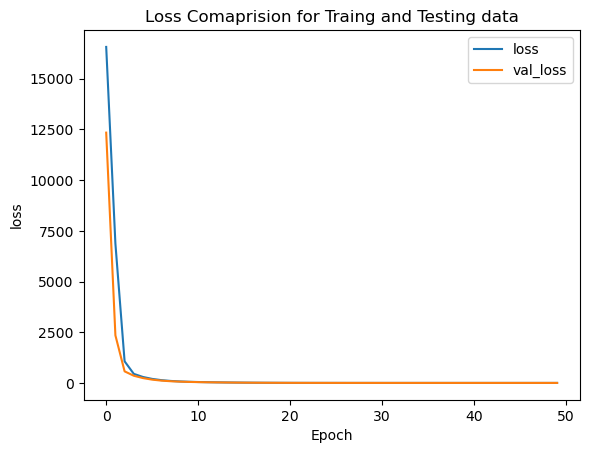

In [19]:
loss_df[['loss','val_loss']].plot()
plt.title('Loss Comaprision for Traing and Testing data')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()

In [20]:
ypred=ann.predict(xtest)
ypred[:5]

141/141 [==============================] - 0s 2ms/step


array([[164.75107],
       [139.62161],
       [109.37852],
       [103.32486],
       [113.11114]], dtype=float32)

In [21]:
predict=pd.DataFrame({'Actual_Value':ytest,'Pred_Value':ypred.flatten()})
predict.head()

,Actual_Value,Pred_Value
0,164.64,164.751068
1,138.47,139.621613
2,109.65,109.378517
3,102.78,103.324860
4,113.52,113.111137


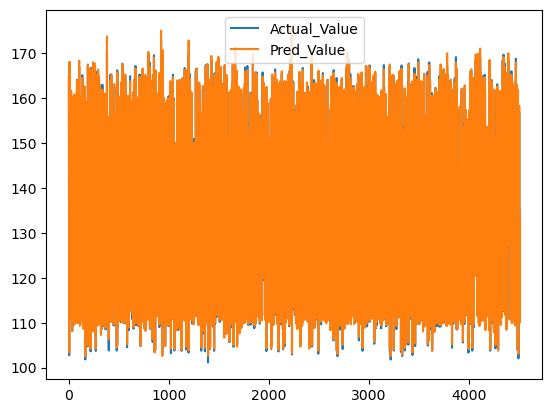

In [22]:
predict.plot();

In [23]:
from sklearn.metrics import r2_score
print(f'R2_score of model is {r2_score(ytest,ypred)}')

R2_score of model is 0.9979203541387526
